In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

선형 회귀

In [4]:
data = pd.read_csv('C:\\workspace\\day13\\data\\boston\\train.csv')
data.drop_duplicates(inplace=True)

In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
data.drop('ID', axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 454
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     455 non-null    float64
 1   ZN       455 non-null    float64
 2   INDUS    455 non-null    float64
 3   CHAS     455 non-null    float64
 4   NOX      455 non-null    float64
 5   RM       455 non-null    float64
 6   AGE      455 non-null    float64
 7   DIS      455 non-null    float64
 8   RAD      455 non-null    float64
 9   TAX      455 non-null    float64
 10  PTRATIO  455 non-null    float64
 11  B        455 non-null    float64
 12  LSTAT    455 non-null    float64
 13  MEDV     455 non-null    float64
dtypes: float64(14)
memory usage: 53.3 KB


<Axes: >

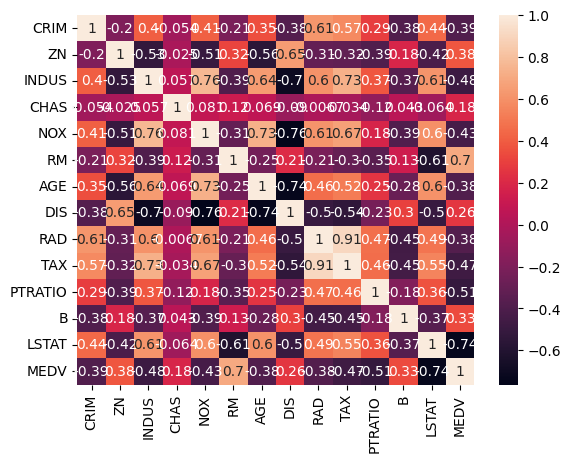

In [9]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True) # CRIM, ZN, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, LSTAT

In [10]:
X = data[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = data['MEDV']

In [11]:
def outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lim = iqr * 1.5
    lower, upper = q1 - lim, q3 + lim
    outliers = (df[column] < lower) | (df[column] > upper)
    return outliers.sum()

In [13]:
print(outlier(data, 'CRIM'),
      outlier(data, 'ZN'),
      outlier(data, 'RM'),
      outlier(data, 'PTRATIO'),
      outlier(data, 'LSTAT'))

58 61 26 13 6


In [14]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

In [16]:
X = mmscaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.7306297006234541

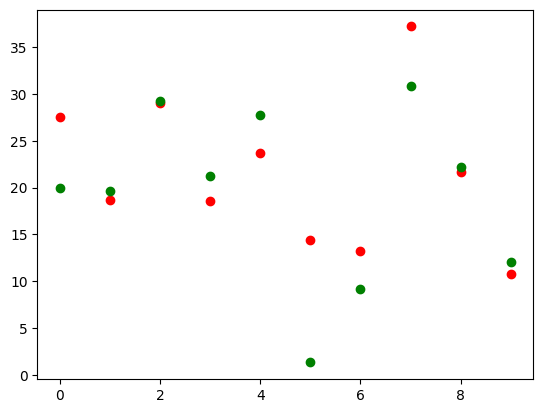

In [28]:
plt.plot(y_test.to_numpy()[:10], 'ro')
plt.plot(pred[:10], 'go')

로지스틱회귀

In [30]:
dt = pd.read_csv('C:\\workspace\\day13\\data\\당뇨병예측\\train.csv')
dt

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


In [31]:
dt.isnull().sum()

ID                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               652 non-null    int64  
 1   Glucose                   652 non-null    int64  
 2   BloodPressure             652 non-null    int64  
 3   SkinThickness             652 non-null    int64  
 4   Insulin                   652 non-null    int64  
 5   BMI                       652 non-null    float64
 6   DiabetesPedigreeFunction  652 non-null    float64
 7   Age                       652 non-null    int64  
 8   Outcome                   652 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 46.0 KB


In [33]:
dt.drop('ID', axis=1, inplace=True)

In [35]:
print(outlier(dt, 'Pregnancies'),
      outlier(dt, 'Glucose'),
      outlier(dt, 'BloodPressure'),
      outlier(dt, 'SkinThickness'),
      outlier(dt, 'Insulin'),
      outlier(dt, 'BMI'),
      outlier(dt, 'DiabetesPedigreeFunction'),
      outlier(dt, 'Age'))

3 4 41 1 32 13 30 8


In [36]:
y = dt.pop('Outcome')
X = dt

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [38]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [40]:
logistic.fit(X_train, y_train)

c:\workspace\VENV\ENV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred = logistic.predict()